## Partie 2 – Traitement de texte (Text Preprocessing)

# OBJECTIFS
    - Nettoyer et transformer les tweets pour la modélisation
    - Réduire la dimensionnalité du corpus
    - Extraire une version épurée et utile du texte

# Étapes à suivre

- Écrire une fonction pour :
    - Tokeniser un tweet
    - Supprimer la ponctuation, les chiffres, les mots courts (< 3 lettres)
    - Supprimer les stopwords
    - Appliquer stemming ou lemmatisation
- Reconstituer un corpus nettoyé
- Analyser :
    - Le nombre total de tokens
    - Le nombre de tokens uniques
    - Le nombre de tokens apparaissant une seule fois
- Visualiser les tokens les plus fréquents (WordCloud)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings('ignore')

# Importer nos fonctions de preprocessing
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from preprocessing import *

In [3]:
# Chargement des données
df = load_data("../data/tweets.csv")
print(f"Dataset: {df.shape[0]} tweets, {df.shape[1]} colonnes")
df.head()

Données chargées avec succès: 7613 lignes, 5 colonnes
Dataset: 7613 tweets, 5 colonnes


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Statistiques des textes originaux:
   total_tweets: 7613.00
   avg_length: 101.04
   median_length: 107.00
   min_length: 7.00
   max_length: 157.00
   avg_word_count: 14.90
   median_word_count: 15.00
   min_word_count: 1.00
   max_word_count: 31.00

Outliers détectés:
   Tweets trop courts (<10 char): 9 (0.1%)
   Tweets trop longs (>280 char): 0 (0.0%)

Exemples de tweets courts:
   1. "LOOOOOOL"
   2. "Cooool :)"
   3. "The end!"

Distribution des classes:
   Classe 0 (non-catastrophe): 4342
   Classe 1 (catastrophe): 3271


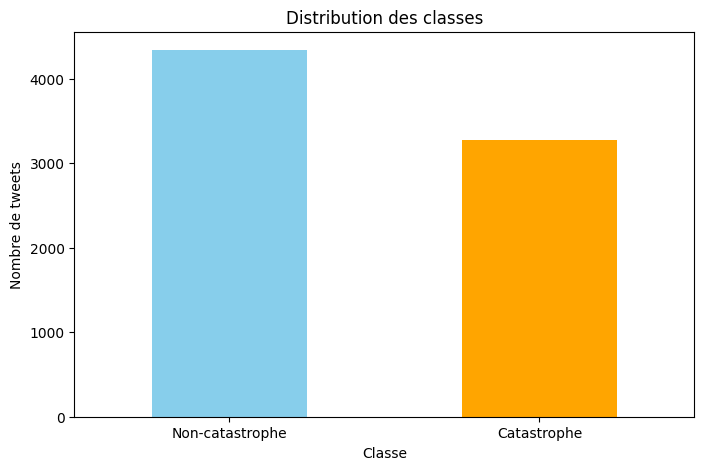

Original: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Preprocessé: deed reason allah forgive all


In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Fonction complète de preprocessing d'un tweet selon les spécifications:
# - Tokeniser
# - Supprimer ponctuation, chiffres, mots courts (< 3 lettres)
# - Supprimer stopwords
# - Appliquer stemming/lemmatisation
def preprocess_tweet(text):
    if pd.isna(text) or text == '':
        return ''
    
    # 1. Tokenisation et nettoyage initial
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
    text = re.sub(r'@\w+', '', text)  # Mentions
    text = re.sub(r'#\w+', '', text)  # Hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Ponctuation et chiffres
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 2. Tokenisation
    tokens = text.split()
    
    # 3. Supprimer mots courts (< 3 lettres)
    tokens = [token for token in tokens if len(token) >= 3]
    
    # 4. Supprimer stopwords et appliquer stemming
    processed_tokens = []
    for token in tokens:
        if not is_stopword(token):  # Fonction simple de détection de stopwords
            stemmed = simple_stem(token)  # Fonction simple de stemming
            processed_tokens.append(stemmed)
    
    return ' '.join(processed_tokens)

def is_stopword(word):
    """Fonction simple de détection des stopwords"""
    stopwords = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with',
        'by', 'from', 'up', 'about', 'into', 'through', 'during', 'before', 'after',
        'above', 'below', 'between', 'among', 'through', 'during', 'before', 'after',
        'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do',
        'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must',
        'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
        'my', 'your', 'his', 'her', 'its', 'our', 'their', 'this', 'that', 'these', 'those'
    }
    return word.lower() in stopwords

def simple_stem(word):
    """Fonction simple de stemming"""
    if word.endswith('ing') and len(word) > 5:
        return word[:-3]
    elif word.endswith('ed') and len(word) > 4:
        return word[:-2]
    elif word.endswith('s') and len(word) > 3:
        return word[:-1]
    return word

# Statistiques sur les textes originaux
text_stats = get_text_statistics(df, 'text')
print("Statistiques des textes originaux:")
for key, value in text_stats.items():
    print(f"   {key}: {value:.2f}")

# Identifier les outliers
outliers_info = identify_outliers(df, 'text', min_length=10, max_length=280)
print(f"\nOutliers détectés:")
print(f"   Tweets trop courts (<10 char): {outliers_info['short_tweets_count']} ({outliers_info['short_tweets_percentage']:.1f}%)")
print(f"   Tweets trop longs (>280 char): {outliers_info['long_tweets_count']} ({outliers_info['long_tweets_percentage']:.1f}%)")

# Exemples de tweets courts
if outliers_info['short_tweets_examples']:
    print(f"\nExemples de tweets courts:")
    for i, tweet in enumerate(outliers_info['short_tweets_examples'][:3]):
        print(f"   {i+1}. \"{tweet}\"")

# Distribution des classes
if 'target' in df.columns:
    print(f"\nDistribution des classes:")
    target_counts = df['target'].value_counts()
    print(f"   Classe 0 (non-catastrophe): {target_counts.get(0, 0)}")
    print(f"   Classe 1 (catastrophe): {target_counts.get(1, 0)}")
    
    # Visualisation
    plt.figure(figsize=(8, 5))
    df['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title('Distribution des classes')
    plt.xlabel('Classe')
    plt.ylabel('Nombre de tweets')
    plt.xticks([0, 1], ['Non-catastrophe', 'Catastrophe'], rotation=0)
    plt.show()

# Test de la fonction de preprocessing sur un échantillon
sample_tweet = df['text'].iloc[0]
print(f"Original: {sample_tweet}")
print(f"Preprocessé: {preprocess_tweet(sample_tweet)}")

In [6]:
# Étape 1: Gestion des valeurs manquantes
print("Étape 1: Gestion des valeurs manquantes")
df_clean = handle_missing_values(df)
print(f"   Valeurs manquantes après traitement: {df_clean.isnull().sum().sum()}")

# Étape 2: Suppression des doublons
print("\nÉtape 2: Suppression des doublons")
df_clean = remove_duplicates(df_clean)

# Étape 3: Application du preprocessing à tout le dataset
print(f"\nÉtape 3: Application du preprocessing complet")
df_processed = preprocess_text_column(df_clean, 'text')
print(f"   Nouvelle colonne 'text_processed' créée")
print(f"   Shape après preprocessing: {df_processed.shape}")

df_processed.head()

Étape 1: Gestion des valeurs manquantes
   Valeurs manquantes après traitement: 0

Étape 2: Suppression des doublons
Doublons supprimés: 0

Étape 3: Exemples de nettoyage de texte

Tweet 1:
   Original: "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
   Nettoyé:  "our deeds are the reason of this may allah forgive us all"
   Sans stopwords: "deeds reason allah forgive"
   Avec stemming: "deed reason allah forgive"
   Preprocessing complet: "deed reason allah forgive"

Tweet 2:
   Original: "Forest fire near La Ronge Sask. Canada"
   Nettoyé:  "forest fire near la ronge sask canada"
   Sans stopwords: "forest fire near la ronge sask canada"
   Avec stemming: "forest fire near la ronge sask canada"
   Preprocessing complet: "forest fire near la ronge sask canada"

Tweet 3:
   Original: "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
   Nettoyé:  "all residents asked to shelter 

In [7]:
# Fonction pour tokeniser et analyser
def analyze_corpus(texts):
    """Analyser un corpus de textes tokenisés"""
    all_tokens = []
    for text in texts:
        if pd.notna(text) and text.strip():
            tokens = text.split()
            # Filtrer les tokens courts (< 3 lettres)
            tokens = [token for token in tokens if len(token) >= 3]
            all_tokens.extend(tokens)
    
    return all_tokens

# Analyse du corpus préprocessé

# Extraction de tous les tokens du corpus préprocessé
all_tokens = []
for text in df_processed['text_processed']:
    if pd.notna(text) and text.strip():
        tokens = text.split()
        all_tokens.extend(tokens)

# Statistiques des tokens
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))
token_counts = Counter(all_tokens)
hapax_tokens = sum(1 for count in token_counts.values() if count == 1)

print("ANALYSE DU CORPUS PRÉPROCESSÉ:")
print(f"Nombre total de tokens: {total_tokens:,}")
print(f"Nombre de tokens uniques: {unique_tokens:,}")
print(f"Tokens apparaissant une seule fois (hapax): {hapax_tokens:,}")
print(f"Pourcentage de hapax: {hapax_tokens/unique_tokens*100:.1f}%")
print(f"Richesse lexicale (TTR): {unique_tokens/total_tokens:.3f}")

# Top 20 des tokens les plus fréquents
print(f"\nTop 20 des tokens les plus fréquents:")
for i, (token, count) in enumerate(token_counts.most_common(20), 1):
    print(f"{i:2d}. {token:<15} ({count:,} occurrences)")

ANALYSE DU CORPUS:
Nombre total de tokens: 65,350
Nombre de tokens uniques: 11,195
Tokens apparaissant une seule fois: 6,213
Pourcentage de hapax: 55.5%
Richesse lexicale: 0.171

Top 20 des tokens les plus fréquents:
 1. fire            (350 occurrences)
 2. new             (349 occurrences)
 3. like            (346 occurrences)
 4. just            (320 occurrences)
 5. not             (300 occurrences)
 6. amp             (300 occurrences)
 7. out             (271 occurrences)
 8. all             (258 occurrences)
 9. get             (255 occurrences)
10. when            (255 occurrences)
11. what            (227 occurrences)
12. bomb            (222 occurrences)
13. now             (221 occurrences)
14. via             (220 occurrences)
15. more            (217 occurrences)
16. dont            (208 occurrences)
17. one             (205 occurrences)
18. people          (197 occurrences)
19. there           (196 occurrences)
20. how             (192 occurrences)

Comparaison avant/aprè

In [ ]:
# Créer des features supplémentaires
df_with_features = create_features(df_processed, 'text')
print(f"Features créées avec succès")

# Afficher les nouvelles colonnes
new_columns = [col for col in df_with_features.columns if col not in df_processed.columns]
print(f"Nouvelles features: {new_columns}")

# Statistiques des features
print(f"\nStatistiques des features:")
feature_stats = df_with_features[new_columns].describe()
display(feature_stats)

# Corrélation entre features
print(f"\nCorrélation entre les features numériques:")
numeric_features = df_with_features.select_dtypes(include=[np.number]).columns
correlation_matrix = df_with_features[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation des features')
plt.tight_layout()
plt.show()

# Afficher quelques exemples avec features
print(f"\nExemples avec features:")
sample_features = ['text', 'text_processed', 'text_length', 'word_count', 'hashtag_count', 'mention_count', 'url_count']
available_features = [f for f in sample_features if f in df_with_features.columns]
display(df_with_features[available_features].head())

# Visualisation des tokens les plus fréquents

# Création du WordCloud
corpus_text = ' '.join(df_clean['text_processed'])

plt.figure(figsize=(15, 8))

# WordCloud global
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=600, height=400, 
                     background_color='white',
                     max_words=100,
                     colormap='viridis').generate(corpus_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Corpus complet')

# WordCloud pour tweets de catastrophe (si colonne target existe)
if 'target' in df_clean.columns:
    plt.subplot(1, 2, 2)
    disaster_corpus = ' '.join(df_clean[df_clean['target'] == 1]['text_processed'])
    wordcloud_disaster = WordCloud(width=600, height=400,
                                  background_color='white',
                                  max_words=100,
                                  colormap='Reds').generate(disaster_corpus)
    plt.imshow(wordcloud_disaster, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud - Tweets de catastrophe')

plt.tight_layout()
plt.show()

# Distribution des fréquences des tokens
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
freq_dist = [count for token, count in token_counts.most_common(50)]
plt.plot(range(1, 51), freq_dist)
plt.title('Distribution des fréquences (Top 50)')
plt.xlabel('Rang')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
freq_values = list(token_counts.values())
plt.hist(freq_values, bins=50, alpha=0.7)
plt.title('Histogramme des fréquences')
plt.xlabel('Fréquence')
plt.ylabel('Nombre de tokens')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Analyse de la réduction de dimensionnalité
original_tokens = []
for text in df['text']:
    if pd.notna(text):
        tokens = text.lower().split()
        original_tokens.extend(tokens)

original_total = len(original_tokens)
original_unique = len(set(original_tokens))

print("RÉDUCTION DE DIMENSIONNALITÉ:")
print(f"Avant: {original_total:,} tokens totaux, {original_unique:,} uniques")
print(f"Après: {total_tokens:,} tokens totaux, {unique_tokens:,} uniques")
print(f"Réduction: {(original_total - total_tokens)/original_total*100:.1f}% tokens, {(original_unique - unique_tokens)/original_unique*100:.1f}% vocabulaire")

# WordCloud simple
corpus_text = ' '.join(df_clean['text_processed'])
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(corpus_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tokens les plus fréquents')
plt.show()

# Sauvegarde des données préprocessées
df_clean.to_csv("../data/tweets_preprocessed.csv", index=False)
print(f"Dataset preprocessé sauvegardé: {len(df_clean)} tweets")

KeyboardInterrupt: 

# PARTIE 3 - MODÉLISATION

- Objectifs
    - Construire un pipeline complet : vectorisation + modèle
    - Évaluer les performances du modèle

- Étapes à suivre
    - Utiliser un TfidfVectorizer ou CountVectorizer et Word2vec
    - Choisir un modèle de classification (Logistic Regression, SVM, etc.)
    - Mettre en place un pipeline avec scikit-learn
    - Utiliser train_test_split ou cross_val_score
    - Évaluer avec : accuracy, precision, recall, f1-score

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Préparation des données
X = df_clean['text_processed']
y = df_clean['target']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train: {len(X_train)} échantillons")
print(f"Test: {len(X_test)} échantillons")
print(f"Distribution train: {y_train.value_counts().to_dict()}")
print(f"Distribution test: {y_test.value_counts().to_dict()}")

In [ ]:
# Définition des pipelines de modèles
models = {
    'LogisticRegression_TF': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'LogisticRegression_Count': Pipeline([
        ('vectorizer', CountVectorizer(max_features=5000, ngram_range=(1, 2))),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'SVM_TF': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', SVC(kernel='linear', random_state=42))
    ]),
    'NaiveBayes_TF': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', MultinomialNB())
    ]),
    'RandomForest_TF': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=3000)),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

# Évaluation des modèles avec validation croisée
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    print(f"{name}: F1-Score CV = {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

# Sélection du meilleur modèle
best_model_name = max(results.keys(), key=lambda k: results[k]['cv_mean'])
best_model = models[best_model_name]
print(f"\nMeilleur modèle: {best_model_name}")

In [ ]:
# Optimisation du meilleur modèle
if 'LogisticRegression' in best_model_name:
    param_grid = {
        'vectorizer__max_features': [3000, 5000, 8000],
        'vectorizer__ngram_range': [(1, 1), (1, 2)],
        'classifier__C': [0.1, 1, 10]
    }
elif 'SVM' in best_model_name:
    param_grid = {
        'vectorizer__max_features': [3000, 5000],
        'classifier__C': [0.1, 1, 10]
    }
else:
    param_grid = {
        'vectorizer__max_features': [3000, 5000]
    }

grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score F1 CV: {grid_search.best_score_:.3f}")

# Modèle final optimisé
final_model = grid_search.best_estimator_

In [ ]:
# Évaluation finale sur le test set
y_pred = final_model.predict(X_test)

# Métriques de performance
print("RÉSULTATS FINAUX:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-catastrophe', 'Catastrophe'],
            yticklabels=['Non-catastrophe', 'Catastrophe'])
plt.title('Matrice de confusion')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.show()

# Analyse des erreurs
errors = X_test[y_test != y_pred]
if len(errors) > 0:
    print(f"\nExemples d'erreurs de classification:")
    for i, tweet in enumerate(errors.head(3)):
        actual = y_test[errors.index[i]]
        predicted = y_pred[errors.index[i]]
        print(f"{i+1}. Réel: {actual}, Prédit: {predicted}")
        print(f"   Texte: {tweet[:100]}...")

print(f"\nModèle final sauvegardé: {best_model_name}")
print(f"Précision sur test: {accuracy_score(y_test, y_pred):.3f}")
print(f"Nombre d'erreurs: {len(errors)}/{len(y_test)}")